### Experimento 3
### IPN- CIC
### Alumno: Jorge Diego García Torres
#### Titulo : Clasificación de los grados de retinopatía diabética en imágenes del fondo del ojo mediante algoritmos de aprendizaje profundo.
####  Ensamble APTOS

In [1]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

import os
import sys
import cv2
import shutil
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing as mp
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Input


def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)


sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
aptostraindf = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')

In [5]:
aptostraindf

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [6]:
train_complete= pd.read_csv('/content/gdrive/My Drive/tesis2/exp3hold-out.csv')
train = pd.read_csv('/content/gdrive/My Drive/tesis2/exp3_5-fold.csv')

In [7]:
train_complete

,id_code,diagnosis,set,index
0,52ae917fcea4,1,train,1196
1,aa4407aab872,0,train,2447
2,6a57a3db3eff,0,train,1511
3,873dcc0b468f,4,train,1917
4,1f4bf8e28b41,2,train,444
...,...,...,...,...
3657,a88365134c3c,0,test,2414
3658,59ee65760535,2,test,1290
3659,0e82bcacc475,4,test,196
3660,b3819a805dca,4,test,2587


In [8]:
train

,id_code,diagnosis,set,fold_0,fold_1,fold_2,fold_3,fold_4,index
0,52ae917fcea4,1,train,train,train,train,train,validation,1196
1,aa4407aab872,0,train,train,train,train,train,validation,2447
2,6a57a3db3eff,0,train,train,train,validation,train,train,1511
3,873dcc0b468f,4,train,train,train,validation,train,train,1917
4,1f4bf8e28b41,2,train,train,train,train,train,validation,444
...,...,...,...,...,...,...,...,...,...
2924,96ce10a1dbd7,0,train,validation,train,train,train,train,2139
2925,b960142a8de7,3,train,train,train,validation,train,train,2678
2926,eb32a815f78c,2,train,validation,train,train,train,train,3395
2927,1c9c583c10bf,0,train,train,train,train,validation,train,392


In [9]:
X_train = train[train['fold_4'] == 'train']
X_val = train[train['fold_4'] == 'validation']
X_test = train_complete[train_complete['set'] == 'test']

In [12]:
X_test

,id_code,diagnosis,set,index
2929,840527bc6628,2,test,1871
2930,c8fc0df22999,1,test,2891
2931,93be637084a2,1,test,2104
2932,3e61703b5ab2,0,test,863
2933,599b89048034,2,test,1287
...,...,...,...,...
3657,a88365134c3c,0,test,2414
3658,59ee65760535,2,test,1290
3659,0e82bcacc475,4,test,196
3660,b3819a805dca,4,test,2587


In [13]:
x_train_i =X_train['index'].values
x_val_i = X_val['index'].values
x_test_i = X_test['index'].values

In [14]:
y_train = pd.get_dummies(aptostraindf['diagnosis']).values
x_train = np.load('/content/gdrive/My Drive/tesis/aptos/train224.npy')

In [15]:
x_train1 = np.empty((2344,224,224,3),dtype='uint8')
x_val1 = np.empty((585,224,224,3),dtype='uint8')

y_train1 =  np.empty((2344,5),dtype='uint8')
y_val1 = np.empty((585,5),dtype='uint8')

for i in range(len(x_train_i)):
  x_train1[i] = x_train[x_train_i[i]]
  y_train1[i] = y_train[x_train_i[i]]

for j in range(len(x_val_i)):
  x_val1[j] = x_train[x_val_i[j]]
  y_val1[j] = y_train[x_val_i[j]]

In [16]:
x_test1= np.empty((733,224,224,3),dtype='uint8')
y_test1= np.empty((733,5),dtype='uint8')

for i in range(len(x_test_i)):
  x_test1[i]= x_train[x_test_i[i]]
  y_test1[i]= y_train[x_test_i[i]]

In [17]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet121
#from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tqdm import tqdm

In [18]:
weights_path_list = ['/content/gdrive/My Drive/tesis2/exp3finalefffold0.h5', '/content/gdrive/My Drive/tesis2/exp3finalefffold1.h5',
                     '/content/gdrive/My Drive/tesis2/exp3finalefffold2.h5', '/content/gdrive/My Drive/tesis2/exp3finalefffold3.h5',
                     '/content/gdrive/My Drive/tesis2/exp3finalefffold4.h5']

In [19]:
def ensemble_preds(model_list, generator):
    preds_ensemble = []
    for model in model_list:
        generator.reset()
        preds = model.predict(generator, verbose = 1)
        preds_ensemble.append(preds)
        generator.reset()

    return np.mean(preds_ensemble, axis=0)


def apply_tta(model, generator, steps=5):
    step_size = generator.n//generator.batch_size
    preds_tta = []
    for i in range(steps):
        generator.reset()
        preds = model.predict_generator(generator, steps=step_size)
        preds_tta.append(preds)

    return np.mean(preds_tta, axis=0)

def test_ensemble_preds(model_list, generator, steps=5):
    preds_ensemble = []
    for model in model_list:
        preds = apply_tta(model, generator, steps)
        preds_ensemble.append(preds)

    return np.mean(preds_ensemble, axis=0)


In [20]:
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)


In [21]:
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=1, seed=2020)
vdata_gen =  val_datagen.flow(x_val1, y_val1, batch_size=1, seed=2020)
tdata_gen =  test_datagen.flow(x_test1, y_test1, batch_size=1, seed=2020)

In [22]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras import applications
from keras import optimizers,Model,Sequential

In [23]:
pip install -U efficientnet

     |████████████████████████████████| 51kB 4.5MB/s 


In [24]:
import efficientnet.keras as efn 

In [25]:
def create_model(input_shape, n_out, weights_path):
    input_tensor = Input(shape=input_shape)
    base_model = efn.EfficientNetB5(weights=None,include_top=False,input_tensor=input_tensor)
    #base_model = applications.ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
    #base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)

    model.load_weights(weights_path)
    return model

In [26]:
model_list = []

for weights_path in weights_path_list:
  model_list.append(create_model(input_shape=(224, 224, 3), n_out=5, weights_path= weights_path))

In [27]:
vdata_gen.reset()

x_vdata = np.zeros((583,224, 224, 3))
y_val2 = np.array([[0,0,0,0,0]])

for i in range(583):
  y_val2 =np.append(y_val2, vdata_gen[i][1], axis=0)
  x_vdata[i]= vdata_gen[i][0]

y_val2 = np.delete(y_val2,0, axis=0)

vdata_gen.reset()

In [28]:
val_gen1 = [np.argmax(pred) for pred in y_val2]
val_gen1

[0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 4,
 0,
 4,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 4,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 0,
 2,
 0,
 2,
 4,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 3,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 4,
 1,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 1,
 0,
 2,
 0,
 4,
 0,
 2,
 0,
 3,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 4,
 1,
 0,
 2,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 4,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 4,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 3,
 2,
 0,
 2,
 0,
 2,
 2,
 4,
 0,
 2,
 0,
 1,
 0,
 2,
 3,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 4,
 0,
 0,
 0,
 2,
 2,
 3,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 4,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 4,
 3,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,


In [29]:
preds_ensemble = []

In [30]:
val_preds_model1 = model_list[0].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model1)
val_preds_model1 = [np.argmax(pred) for pred in val_preds_model1]


19/19 [==============================] - 1s 72ms/step


In [31]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model1, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.957


In [32]:
val_preds_model2 = model_list[1].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model2)
val_preds_model2 = [np.argmax(pred) for pred in val_preds_model2]

19/19 [==============================] - 1s 66ms/step


In [33]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model2, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.941


In [34]:
val_preds_model3 = model_list[2].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model3)
val_preds_model3 = [np.argmax(pred) for pred in val_preds_model3]

19/19 [==============================] - 1s 65ms/step


In [35]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model3, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.946


In [36]:
val_preds_model4 = model_list[3].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model4)
val_preds_model4 = [np.argmax(pred) for pred in val_preds_model4]

19/19 [==============================] - 1s 66ms/step


In [37]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model4, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.953


In [38]:
val_preds_model5 = model_list[4].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model5)
val_preds_model5 = [np.argmax(pred) for pred in val_preds_model5]

19/19 [==============================] - 1s 65ms/step


In [39]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model5, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.899


In [40]:
preds_ensemble =  np.mean(preds_ensemble, axis=0)
preds_ensemble = [np.argmax(pred) for pred in preds_ensemble]

In [41]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(preds_ensemble, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.958


In [42]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    
    df_cm = pd.DataFrame(cf, range(len(classes)), range(len(classes)))
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g')
    #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.show()

In [43]:
import seaborn as sns

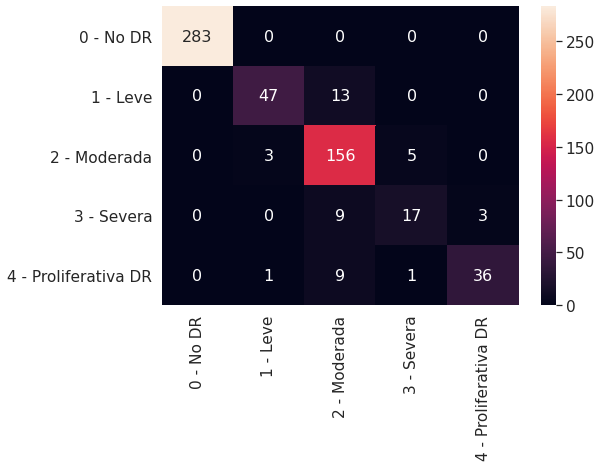

In [44]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(val_gen1,preds_ensemble,labels)

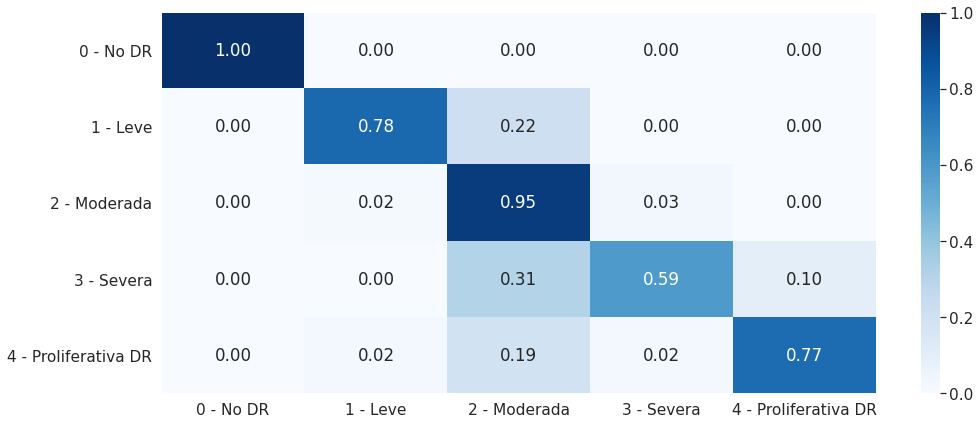

In [45]:
cnf_matrix = confusion_matrix(val_gen1, preds_ensemble)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [46]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

In [47]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_gen1, preds_ensemble, weights='quadratic'))
print("Val Accuracy score : %.3f" % accuracy_score(val_gen1, preds_ensemble))

print('F1 score: %.3f' % f1_score(val_gen1, preds_ensemble,average='micro'))
print('F1 score: %.3f' % f1_score(val_gen1, preds_ensemble,average='weighted'))
print('F1 score: %.3f' % f1_score(val_gen1, preds_ensemble,average='macro'))


print('Recall: %.3f' % recall_score(val_gen1, preds_ensemble,average='micro'))
print('Recall: %.3f' % recall_score(val_gen1, preds_ensemble,average='weighted'))
print('Recall: %.3f' % recall_score(val_gen1, preds_ensemble,average='macro'))

print('Precision: %.3f' % precision_score(val_gen1, preds_ensemble,average='micro'))
print('Precision: %.3f' % precision_score(val_gen1, preds_ensemble,average='weighted'))
print('Precision: %.3f' % precision_score(val_gen1, preds_ensemble,average='macro'))

print('\n clasification report:\n  ' + classification_report(val_gen1, preds_ensemble)) 

Val Cohen Kappa score: 0.958
Val Accuracy score : 0.925
F1 score: 0.925
F1 score: 0.923
F1 score: 0.845
Recall: 0.925
Recall: 0.925
Recall: 0.817
Precision: 0.925
Precision: 0.926
Precision: 0.884

 clasification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       283
           1       0.92      0.78      0.85        60
           2       0.83      0.95      0.89       164
           3       0.74      0.59      0.65        29
           4       0.92      0.77      0.84        47

    accuracy                           0.92       583
   macro avg       0.88      0.82      0.85       583
weighted avg       0.93      0.92      0.92       583



test data sin TTA

In [48]:
tdata_gen.reset()

x_tdata = np.zeros((733,224, 224, 3))
y_test2 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_test2 =np.append(y_test2, tdata_gen[i][1], axis=0)
  x_tdata[i]= tdata_gen[i][0]

y_test2 = np.delete(y_test2,0, axis=0)

tdata_gen.reset()

In [49]:
tpreds_ensemble = []

In [50]:
test_preds_model1 = model_list[0].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model1)
test_preds_model1 = [np.argmax(pred) for pred in test_preds_model1]

23/23 [==============================] - 2s 77ms/step


In [51]:
test_gen1 = [np.argmax(pred) for pred in y_test2]

In [52]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model1, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.903


In [53]:
test_preds_model2 = model_list[1].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model2)
test_preds_model2 = [np.argmax(pred) for pred in test_preds_model2]

23/23 [==============================] - 2s 69ms/step


In [54]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model2, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.916


In [55]:
test_preds_model3 = model_list[2].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model3)
test_preds_model3 = [np.argmax(pred) for pred in test_preds_model3]

23/23 [==============================] - 2s 68ms/step


In [56]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model3, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.884


In [57]:
test_preds_model4 = model_list[3].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model4)
test_preds_model4 = [np.argmax(pred) for pred in test_preds_model4]

23/23 [==============================] - 2s 68ms/step


In [58]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model4, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.909


In [59]:
test_preds_model5 = model_list[4].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model5)
test_preds_model5 = [np.argmax(pred) for pred in test_preds_model5]

23/23 [==============================] - 2s 67ms/step


In [60]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model5, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.911


In [61]:
tpreds_ensemble =  np.mean(tpreds_ensemble, axis=0)
tpreds_ensemble = [np.argmax(pred) for pred in tpreds_ensemble]

In [62]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(tpreds_ensemble, test_gen1, weights='quadratic'))

Test Cohen Kappa score: 0.919


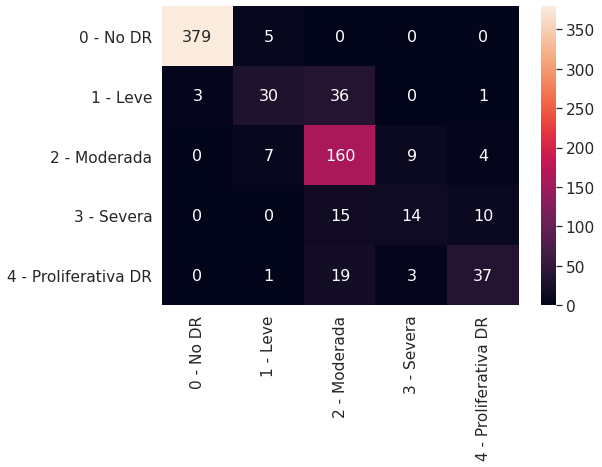

In [63]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(test_gen1,tpreds_ensemble,labels)

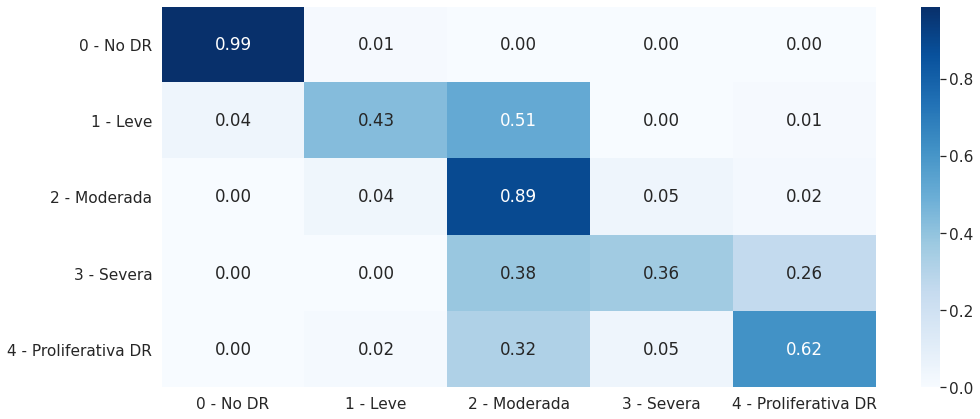

In [64]:
cnf_matrix = confusion_matrix(test_gen1, tpreds_ensemble)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [67]:
cf = cnf_matrix

In [68]:
FP = cf.sum(axis=0) - np.diag(cf)  
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP')
print(FP)
print('FN')
print(FN)
print('TP')
print(TP)
print('TN')
print(TN)
print('Sensitivity')
print(TPR)
print('Specificity')
print(TNR)
print('Precision')
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print('Acc')
print(ACC)

print('Sensitivity mean')
print(np.mean(TPR))
print('Specificity mean')
print(np.mean(TNR))
print('Precision mean')
print(np.mean(PPV))


FP
[ 3 13 70 12 15]
FN
[ 5 40 20 25 23]
TP
[379  30 160  14  37]
TN
[346 650 483 682 658]
Sensitivity
[0.98697917 0.42857143 0.88888889 0.35897436 0.61666667]
Specificity
[0.99140401 0.98039216 0.87341772 0.98270893 0.97771174]
Precision
[0.9921466  0.69767442 0.69565217 0.53846154 0.71153846]
[0.98575499 0.94202899 0.96023857 0.96463932 0.96622614]
[0.00859599 0.01960784 0.12658228 0.01729107 0.02228826]
[0.01302083 0.57142857 0.11111111 0.64102564 0.38333333]
[0.0078534  0.30232558 0.30434783 0.46153846 0.28846154]
Acc
[0.98908595 0.92769441 0.87721692 0.94952251 0.94815825]
Sensitivity mean
0.6560161019536019
Specificity mean
0.9611269124090056
Precision mean
0.7270946378752667


In [66]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(test_gen1, tpreds_ensemble, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(test_gen1, tpreds_ensemble))

print('F1 score: %.3f' % f1_score(test_gen1, tpreds_ensemble,average='micro'))
print('F1 score: %.3f' % f1_score(test_gen1, tpreds_ensemble,average='weighted'))
print('F1 score: %.3f' % f1_score(test_gen1, tpreds_ensemble,average='macro'))

print('Recall: %.3f' % recall_score(test_gen1, tpreds_ensemble,average='micro'))
print('Recall: %.3f' % recall_score(test_gen1, tpreds_ensemble,average='weighted'))
print('Recall: %.3f' % recall_score(test_gen1, tpreds_ensemble,average='macro'))

print('Precision: %.3f' % precision_score(test_gen1, tpreds_ensemble,average='micro'))
print('Precision: %.3f' % precision_score(test_gen1, tpreds_ensemble,average='weighted'))
print('Precision: %.3f' % precision_score(test_gen1, tpreds_ensemble,average='macro'))

print('\n clasification report:\n  ' + classification_report(test_gen1, tpreds_ensemble)) 

Test Cohen Kappa score: 0.919
Test Accuracy score : 0.846
F1 score: 0.846
F1 score: 0.838
F1 score: 0.679
Recall: 0.846
Recall: 0.846
Recall: 0.656
Precision: 0.846
Precision: 0.844
Precision: 0.727

 clasification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       384
           1       0.70      0.43      0.53        70
           2       0.70      0.89      0.78       180
           3       0.54      0.36      0.43        39
           4       0.71      0.62      0.66        60

    accuracy                           0.85       733
   macro avg       0.73      0.66      0.68       733
weighted avg       0.84      0.85      0.84       733



In [69]:
from scipy import stats

In [ ]:
#stats.trim_mean()

trim mean


In [70]:
tdata_gen.reset()

x_tdata = np.zeros((733,224, 224, 3))
y_test2 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_test2 =np.append(y_test2, tdata_gen[i][1], axis=0)
  x_tdata[i]= tdata_gen[i][0]

y_test2 = np.delete(y_test2,0, axis=0)

tdata_gen.reset()

In [71]:
test_gen1 = [np.argmax(pred) for pred in y_test2]

In [72]:
tpreds_ensemble = []

In [81]:
test_preds_model1 = model_list[0].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model1)
test_preds_model1 = [np.argmax(pred) for pred in test_preds_model1]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model1, test_gen1, weights='quadratic'))

23/23 [==============================] - 2s 68ms/step
test Cohen Kappa score: 0.905


In [82]:
test_preds_model2 = model_list[1].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model2)
test_preds_model2 = [np.argmax(pred) for pred in test_preds_model2]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model2, test_gen1, weights='quadratic'))

23/23 [==============================] - 2s 68ms/step
test Cohen Kappa score: 0.927


In [83]:
test_preds_model3 = model_list[2].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model3)
test_preds_model3 = [np.argmax(pred) for pred in test_preds_model3]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model3, test_gen1, weights='quadratic'))

23/23 [==============================] - 2s 68ms/step
test Cohen Kappa score: 0.894


In [84]:
test_preds_model4 = model_list[3].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model4)
test_preds_model4 = [np.argmax(pred) for pred in test_preds_model4]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model4, test_gen1, weights='quadratic'))

23/23 [==============================] - 2s 68ms/step
test Cohen Kappa score: 0.901


In [85]:
test_preds_model5 = model_list[4].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model5)
test_preds_model5 = [np.argmax(pred) for pred in test_preds_model5]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model5, test_gen1, weights='quadratic'))

23/23 [==============================] - 2s 67ms/step
test Cohen Kappa score: 0.903


In [86]:
t1preds_ensemble =  stats.trim_mean(tpreds_ensemble,.25, axis=0)
t1preds_ensemble = [np.argmax(pred) for pred in t1preds_ensemble]

In [87]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(t1preds_ensemble, test_gen1, weights='quadratic'))

Test Cohen Kappa score: 0.921


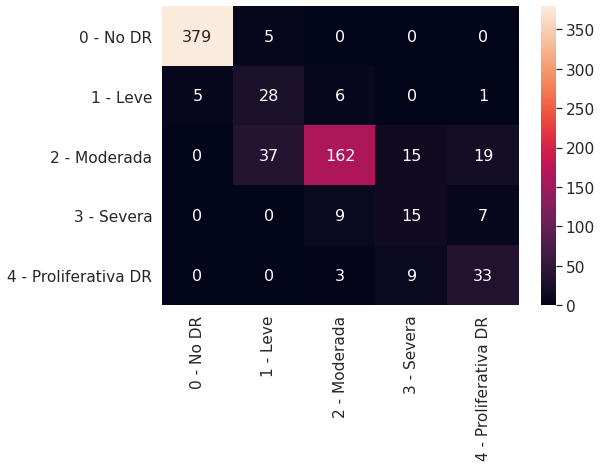

In [89]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(t1preds_ensemble,test_gen1,labels)

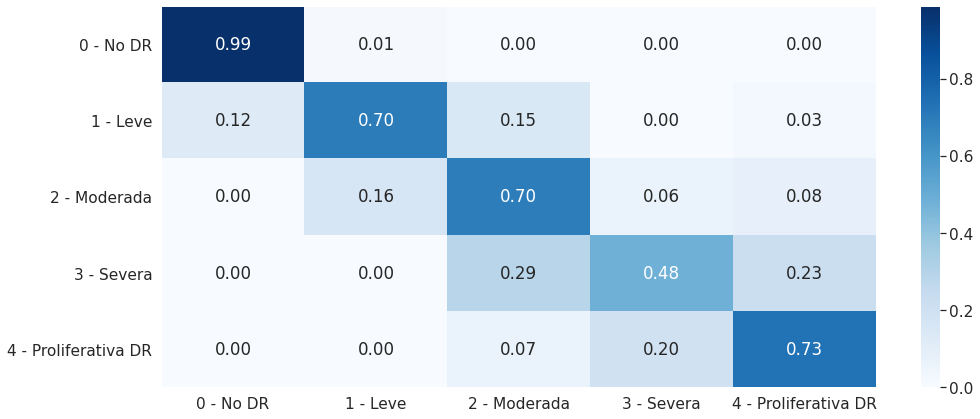

In [90]:
cnf_matrix = confusion_matrix(t1preds_ensemble, test_gen1)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [91]:
cf = cnf_matrix

In [94]:
FP = cf.sum(axis=0) - np.diag(cf)  
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP')
print(FP)
print('FN')
print(FN)
print('TP')
print(TP)
print('TN')
print(TN)
print('Sensitivity')
print(TPR)
print('Specificity')
print(TNR)
print('Precision')
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print('Acc')
print(ACC)

print('Sensitivity mean')
print(np.mean(TPR))
print('Specificity mean')
print(np.mean(TNR))
print('Precision mean')
print(np.mean(PPV))


FP
[ 5 42 18 24 27]
FN
[ 5 12 71 16 12]
TP
[379  28 162  15  33]
TN
[344 651 482 678 661]
Sensitivity
[0.98697917 0.7        0.69527897 0.48387097 0.73333333]
Specificity
[0.98567335 0.93939394 0.964      0.96581197 0.96075581]
Precision
[0.98697917 0.4        0.9        0.38461538 0.55      ]
[0.98567335 0.98190045 0.8716094  0.97694524 0.98216939]
[0.01432665 0.06060606 0.036      0.03418803 0.03924419]
[0.01302083 0.3        0.30472103 0.51612903 0.26666667]
[0.01302083 0.6        0.1        0.61538462 0.45      ]
Acc
[0.98635744 0.92633015 0.87858117 0.94542974 0.946794  ]
Sensitivity mean
0.7198924875398034
Specificity mean
0.9631270143189848
Precision mean
0.6443189102564103


In [95]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(test_gen1, t1preds_ensemble, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(test_gen1, t1preds_ensemble))

print('F1 score: %.3f' % f1_score(test_gen1, t1preds_ensemble,average='micro'))
print('F1 score: %.3f' % f1_score(test_gen1, t1preds_ensemble,average='weighted'))
print('F1 score: %.3f' % f1_score(test_gen1, t1preds_ensemble,average='macro'))

print('Recall: %.3f' % recall_score(test_gen1, t1preds_ensemble,average='micro'))
print('Recall: %.3f' % recall_score(test_gen1, t1preds_ensemble,average='weighted'))
print('Recall: %.3f' % recall_score(test_gen1, t1preds_ensemble,average='macro'))

print('Precision: %.3f' % precision_score(test_gen1, t1preds_ensemble,average='micro'))
print('Precision: %.3f' % precision_score(test_gen1, t1preds_ensemble,average='weighted'))
print('Precision: %.3f' % precision_score(test_gen1, t1preds_ensemble,average='macro'))

print('\n clasification report:\n  ' + classification_report(test_gen1, t1preds_ensemble))

Test Cohen Kappa score: 0.921
Test Accuracy score : 0.842
F1 score: 0.842
F1 score: 0.833
F1 score: 0.668
Recall: 0.842
Recall: 0.842
Recall: 0.644
Precision: 0.842
Precision: 0.840
Precision: 0.720

 clasification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       384
           1       0.70      0.40      0.51        70
           2       0.70      0.90      0.78       180
           3       0.48      0.38      0.43        39
           4       0.73      0.55      0.63        60

    accuracy                           0.84       733
   macro avg       0.72      0.64      0.67       733
weighted avg       0.84      0.84      0.83       733



TTA

In [96]:
def apply_tta(model, generator, steps=5):
    step_size = generator.n//generator.batch_size
    preds_tta = []
    for i in range(steps):
        generator.reset()
        preds = model.predict_generator(generator, steps=step_size, verbose= 1)
        preds_tta.append(preds)

    return np.mean(preds_tta, axis=0)

In [97]:
def test_ensemble_preds(model_list, generator, steps=5):
    preds_ensemble = []
    for model in model_list:
        preds = apply_tta(model, generator, steps)
        preds_ensemble.append(preds)

    return np.mean(preds_ensemble, axis=0)

In [98]:
TTA_STEPS = 10

In [99]:
tdata_gen.reset()

x_tdata = np.zeros((733,224, 224, 3))
y_test2 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_test2 =np.append(y_test2, tdata_gen[i][1], axis=0)
  x_tdata[i]= tdata_gen[i][0]

y_test2 = np.delete(y_test2,0, axis=0)

tdata_gen.reset()

In [100]:
tdata_gen.reset()

x_tdata1 = np.zeros((733,224, 224, 3))
y_test12 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_test12 =np.append(y_test12, tdata_gen[i][1], axis=0)
  x_tdata1[i]= tdata_gen[i][0]

y_test12 = np.delete(y_test12,0, axis=0)

tdata_gen.reset()

In [101]:
tdata_gen.reset()

x_tdata2 = np.zeros((733,224, 224, 3))
y_test22 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_test22 =np.append(y_test22, tdata_gen[i][1], axis=0)
  x_tdata2[i]= tdata_gen[i][0]

y_test22 = np.delete(y_test22,0, axis=0)

tdata_gen.reset()

In [102]:
tdata_gen.reset()

x_tdata3 = np.zeros((733,224, 224, 3))
y_test32 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_test32 =np.append(y_test32, tdata_gen[i][1], axis=0)
  x_tdata3[i]= tdata_gen[i][0]

y_test32 = np.delete(y_test32,0, axis=0)

tdata_gen.reset()

In [103]:
tdata_gen.reset()

x_tdata4 = np.zeros((733,224, 224, 3))
y_test42 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_test42 =np.append(y_test42, tdata_gen[i][1], axis=0)
  x_tdata4[i]= tdata_gen[i][0]

y_test42 = np.delete(y_test42,0, axis=0)

tdata_gen.reset()

In [104]:
tdata_gen.reset()

x_tdata5 = np.zeros((733,224, 224, 3))
y_test52 = np.array([[0,0,0,0,0]])

for i in range(733):
  y_test52 =np.append(y_test52, tdata_gen[i][1], axis=0)
  x_tdata5[i]= tdata_gen[i][0]

y_test52 = np.delete(y_test52,0, axis=0)

tdata_gen.reset()

In [105]:
preds_ensemble = []

In [106]:
preds_tta = []

In [107]:
test_preds_model1 = model_list[0].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model1)

test_model1 = np.mean(preds_tta, axis=0)

23/23 [==============================] - 2s 68ms/step


In [108]:
preds_ensemble.append(test_model1)

In [109]:
preds_tta = []

In [110]:
test_preds_model2 = model_list[1].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model2)

test_model2 = np.mean(preds_tta, axis=0)

23/23 [==============================] - 2s 68ms/step


In [111]:
preds_ensemble.append(test_model2)

In [112]:
preds_tta = []

In [113]:
test_preds_model3 = model_list[2].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model3)

test_model3 = np.mean(preds_tta, axis=0)

23/23 [==============================] - 2s 68ms/step


In [114]:
preds_ensemble.append(test_model3)

In [115]:
preds_tta = []

In [116]:
test_preds_model3 = model_list[3].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model3)

test_model4 = np.mean(preds_tta, axis=0)

23/23 [==============================] - 2s 68ms/step


In [117]:
preds_ensemble.append(test_model4)

In [118]:
preds_tta = []

In [119]:
test_preds_model3 = model_list[4].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model3)

test_model5 = np.mean(preds_tta, axis=0)

23/23 [==============================] - 2s 67ms/step


In [120]:
preds_ensemble.append(test_model5)

In [121]:
preds_tta = []

In [122]:
ttapreds= np.mean(preds_ensemble, axis=0)

In [125]:
ttapreds1 = [np.argmax(pred) for pred in ttapreds]

In [124]:
c=y_test2 == y_test32
c.all()

True

In [126]:
y_test2tta = [np.argmax(pred) for pred in y_test2]

In [127]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(ttapreds1, y_test2tta, weights='quadratic'))

test Cohen Kappa score: 0.923


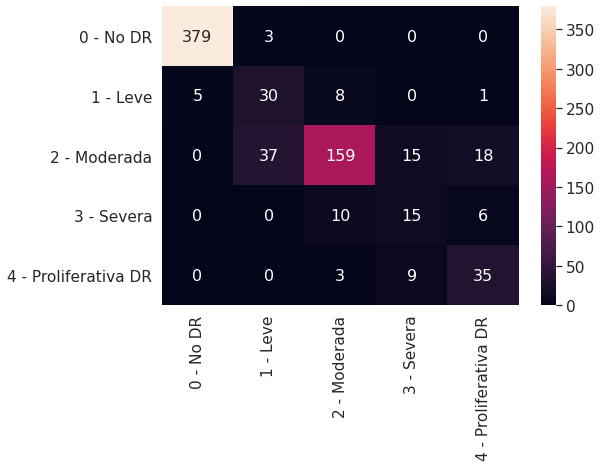

In [131]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(ttapreds1,y_test2tta, labels)

In [132]:
cf = confusion_matrix(y_test2tta, ttapreds1)

In [133]:
FP = cf.sum(axis=0) - np.diag(cf)  
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP')
print(FP)
print('FN')
print(FN)
print('TP')
print(TP)
print('TN')
print(TN)
print('Sensitivity')
print(TPR)
print('Specificity')
print(TNR)
print('Precision')
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print('Acc')
print(ACC)

print('Sensitivity mean')
print(np.mean(TPR))
print('Specificity mean')
print(np.mean(TNR))
print('Precision mean')
print(np.mean(PPV))


FP
[ 3 14 70 16 12]
FN
[ 5 40 21 24 25]
TP
[379  30 159  15  35]
TN
[346 649 483 678 661]
Sensitivity
[0.98697917 0.42857143 0.88333333 0.38461538 0.58333333]
Specificity
[0.99140401 0.97888386 0.87341772 0.97694524 0.98216939]
Precision
[0.9921466  0.68181818 0.69432314 0.48387097 0.74468085]
[0.98575499 0.94194485 0.95833333 0.96581197 0.96355685]
[0.00859599 0.02111614 0.12658228 0.02305476 0.01783061]
[0.01302083 0.57142857 0.11666667 0.61538462 0.41666667]
[0.0078534  0.31818182 0.30567686 0.51612903 0.25531915]
Acc
[0.98908595 0.92633015 0.87585266 0.94542974 0.94952251]
Sensitivity mean
0.6533665293040294
Specificity mean
0.9605640459922796
Precision mean
0.7193679483174779


In [134]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(ttapreds1, y_test2tta, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(ttapreds1, y_test2tta))

print('F1 score: %.3f' % f1_score(ttapreds1, y_test2tta,average='micro'))
print('F1 score: %.3f' % f1_score(ttapreds1, y_test2tta,average='weighted'))
print('F1 score: %.3f' % f1_score(y_test2tta,ttapreds1,average='macro'))

print('Recall: %.3f' % recall_score(ttapreds1, y_test2tta,average='micro'))
print('Recall: %.3f' % recall_score(ttapreds1, y_test2tta,average='weighted'))
print('Recall: %.3f' % recall_score(y_test2tta,ttapreds1,average='macro'))

print('Precision: %.3f' % precision_score(ttapreds1, y_test2tta,average='micro'))
print('Precision: %.3f' % precision_score(ttapreds1, y_test2tta,average='weighted'))
print('Precision: %.3f' % precision_score(y_test2tta,ttapreds1,average='macro'))

print('\n clasification report:\n  ' + classification_report(ttapreds1, y_test2tta))

Test Cohen Kappa score: 0.923
Test Accuracy score : 0.843
F1 score: 0.843
F1 score: 0.850
F1 score: 0.675
Recall: 0.843
Recall: 0.843
Recall: 0.653
Precision: 0.843
Precision: 0.870
Precision: 0.719

 clasification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       382
           1       0.43      0.68      0.53        44
           2       0.88      0.69      0.78       229
           3       0.38      0.48      0.43        31
           4       0.58      0.74      0.65        47

    accuracy                           0.84       733
   macro avg       0.65      0.72      0.68       733
weighted avg       0.87      0.84      0.85       733



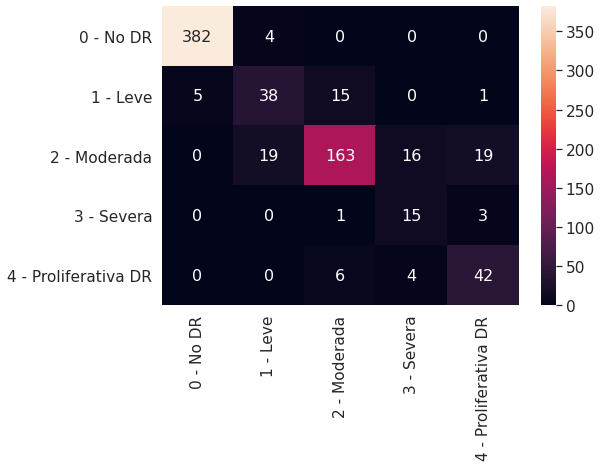

In [ ]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(ttapreds1, y_test2tta,labels)

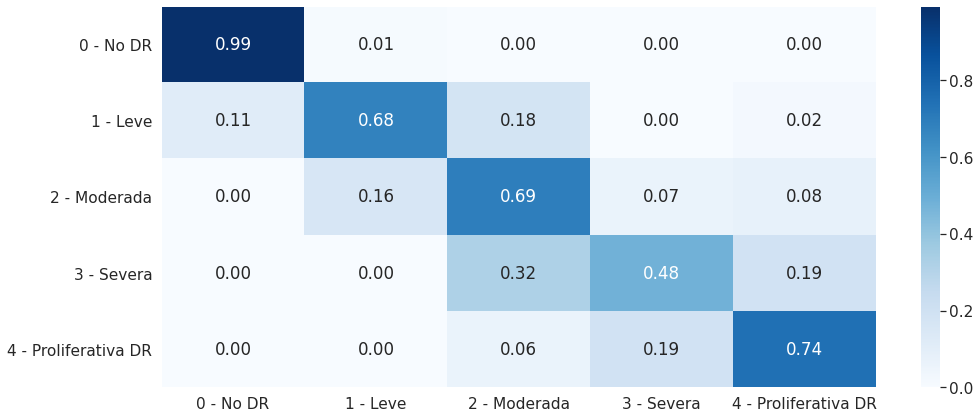

In [135]:
cnf_matrix = confusion_matrix(ttapreds1, y_test2tta)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

# TTA y trimedian

In [136]:
preds_ensemble = []


for i in range(len(model_list)):
  preds_tta = []

  test_preds_model = model_list[i].predict(x_tdata, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata1, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata2, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata3, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata4, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata5, verbose = 1)
  preds_tta.append(test_preds_model)

  test_model = stats.trim_mean(preds_tta,0.25, axis=0)
  preds_ensemble.append(test_model)

preds1_ensemble = stats.trim_mean(preds_ensemble,0.25, axis=0)


23/23 [==============================] - 2s 67ms/step


In [137]:
preds1_ensemble1 = [np.argmax(pred) for pred in preds1_ensemble]

In [139]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(preds1_ensemble1, y_test2tta, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(preds1_ensemble1, y_test2tta))

print('F1 score: %.3f' % f1_score(preds1_ensemble1, y_test2tta,average='micro'))
print('F1 score: %.3f' % f1_score(preds1_ensemble1, y_test2tta,average='weighted'))
print('F1 score: %.3f' % f1_score( y_test2tta,preds1_ensemble1,average='macro'))

print('Recall: %.3f' % recall_score(preds1_ensemble1, y_test2tta,average='micro'))
print('Recall: %.3f' % recall_score(y_test2tta,preds1_ensemble1,average='weighted'))
print('Recall: %.3f' % recall_score(y_test2tta,preds1_ensemble1,average='macro'))


print('Precision: %.3f' % precision_score(preds1_ensemble1, y_test2tta,average='micro'))
print('Precision: %.3f' % precision_score(preds1_ensemble1, y_test2tta,average='weighted'))
print('Precision: %.3f' % precision_score(y_test2tta, preds1_ensemble1, average='macro'))

print('\n clasification report:\n  ' + classification_report(preds1_ensemble1, y_test2tta))

Test Cohen Kappa score: 0.922
Test Accuracy score : 0.843
F1 score: 0.843
F1 score: 0.851
F1 score: 0.669
Recall: 0.843
Recall: 0.843
Recall: 0.647
Precision: 0.843
Precision: 0.873
Precision: 0.716

 clasification report:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99       383
           1       0.43      0.71      0.54        42
           2       0.89      0.70      0.79       230
           3       0.36      0.47      0.41        30
           4       0.57      0.71      0.63        48

    accuracy                           0.84       733
   macro avg       0.65      0.72      0.67       733
weighted avg       0.87      0.84      0.85       733

